# Car Bayesian Network
Creating bayesian network to model use cases in [httplus://synergo.atlassian.net/wiki/spaces/CLNTMMC/pages/1812529153/RFP+-+Extra+use+cases+-+Appendix+A](httplus://synergo.atlassian.net/wiki/spaces/CLNTMMC/pages/1812529153/RFP+-+Extra+use+cases+-+Appendix+A).

Doing path-setting:

In [1]:
import os
import sys


os.getcwd()
# Setting the baseline:
os.chdir('/development/projects/statisticallyfit/github/learningmathstat/PythonProbabilisticGraphicalModels')


curPath: str = os.getcwd() + "/src/PgmpyStudy/"

dataPath: str = os.getcwd() + "/src/_data/"
imagePath: str = curPath + 'images/'

print("curPath = ", curPath, "\n")
print("dataPath = ", dataPath, "\n")
print('imagePath = ', imagePath, "\n")


# Making files in utils folder visible here: to import my local print functions for nn.Module objects
sys.path.append(os.getcwd() + "/src/utils/")
# For being able to import files within PgmpyStudy folder
sys.path.append(curPath)

#sys.path.remove('/development/projects/statisticallyfit/github/learningmathstat/PythonNeuralNetNLP/src/utils/')
#sys.path.remove('/development/projects/statisticallyfit/github/learningmathstat/PythonNeuralNetNLP/src/PgmpyStudy/')

sys.path

curPath =  /development/projects/statisticallyfit/github/learningmathstat/PythonProbabilisticGraphicalModels/src/PgmpyStudy/ 

dataPath =  /development/projects/statisticallyfit/github/learningmathstat/PythonProbabilisticGraphicalModels/src/_data/ 

imagePath =  /development/projects/statisticallyfit/github/learningmathstat/PythonProbabilisticGraphicalModels/src/PgmpyStudy/images/ 



['/development/projects/statisticallyfit/github/learningmathstat/PythonProbabilisticGraphicalModels/src/PgmpyStudy',
 '/development/bin/python/conda3_ana/envs/pybayesian_env/lib/python37.zip',
 '/development/bin/python/conda3_ana/envs/pybayesian_env/lib/python3.7',
 '/development/bin/python/conda3_ana/envs/pybayesian_env/lib/python3.7/lib-dynload',
 '',
 '/development/bin/python/conda3_ana/envs/pybayesian_env/lib/python3.7/site-packages',
 '/development/bin/python/conda3_ana/envs/pybayesian_env/lib/python3.7/site-packages/IPython/extensions',
 '/home/statisticallyfit/.ipython',
 '/development/projects/statisticallyfit/github/learningmathstat/PythonProbabilisticGraphicalModels/src/utils/',
 '/development/projects/statisticallyfit/github/learningmathstat/PythonProbabilisticGraphicalModels/src/PgmpyStudy/']

Science imports:

In [2]:
from pgmpy.models import BayesianModel
from pgmpy.inference import VariableElimination
from pgmpy.factors.discrete import TabularCPD
from pgmpy.factors.discrete import JointProbabilityDistribution
from pgmpy.factors.discrete.DiscreteFactor import DiscreteFactor
from pgmpy.independencies import Independencies
from pgmpy.independencies.Independencies import IndependenceAssertion


from operator import mul
from functools import reduce

import itertools
import collections



from src.utils.TypeAliases import *

from src.utils.GraphvizUtil import *
from src.utils.NetworkUtil import *
from src.utils.DataUtil import *
from src.utils.GenericUtil import *

from typing import *

# My type alias for clarity

import pandas as pd
from pandas.core.frame import DataFrame

## Step 1: Creating / Loading Data

In [3]:

# Create named tuple class with names "Names" and "Objects"
#RandomVariable = collections.namedtuple("RandomVariable", ["var", "states"]) # already in type aliases


Process = RandomVariable(var ="Process", states = {'Accel-Pedal',
                                                    'Door-Mount',
                                                    'Engine-Mount',
                                                    'Engine-Wiring',
                                                    'Oil-Fill',
                                                    'Sun-Roof-Housing'})

Tool = RandomVariable(var ="Tool", states = {'Forklift', 'Front-Right-Door', 'Oil', 'Power-Gun'})

Injury = RandomVariable(var ="Injury", states = {'Chemical-Burn',
                                                  'Contact-Contusion',
                                                  'Electrical-Burn',
                                                  'Electrical-Shock',
                                                  'Fall-Gtm'})

#Absenteeism = RandomVariable(var = "Absenteeism", states =  ['Absenteeism-00',
#                                                                       'Absenteeism-01',
#                                                                       'Absenteeism-02',
#                                                                       'Absenteeism-03'])
Absenteeism = RandomVariable(var ="Absenteeism", states =  {'Low', 'Medium', 'High'})


# Make 30 days to represent 1 month
Time = RandomVariable(var = "Time", states = set(range(1, 31))) # list(map(lambda day : str(day), range(1, 31))))

#Training = RandomVariable(var = "Training", states = ['Training-00',
#                                                                'Training-01',
#                                                                'Training-02',
#                                                                'Training-03'])
Training = RandomVariable(var ="Training", states = {'Low', 'Medium', 'High'})

#Exertion = RandomVariable(var = "Exertion", states = ['Exertion-00',
#                                                                'Exertion-01',
#                                                                'Exertion-02',
#                                                                'Exertion-03'])
Exertion = RandomVariable(var ="Exertion", states = {'Low', 'Medium', 'High'})

#Experience = RandomVariable(var = "Experience", states = ['Experience-00',
#                                                                    'Experience-01',
#                                                                    'Experience-02',
#                                                                    'Experience-03'])
Experience = RandomVariable(var ="Experience", states = {'Low', 'Medium', 'High'})

#WorkCapacity = RandomVariable(var = "WorkCapacity", states = ['WorkCapacity-00',
#                                                              'WorkCapacity-01',
#                                                              'WorkCapacity-02',
#                                                              'WorkCapacity-03'])
WorkCapacity = RandomVariable(var = "WorkCapacity", states = {'Low', 'Medium', 'High'})

varDict = {Time.var : Time.states,
            Training.var : Training.states,
            Exertion.var : Exertion.states,
            Experience.var : Experience.states,
            WorkCapacity.var : WorkCapacity. states,
            Process.var : Process.states,
            Tool.var : Tool.states,
            Injury.var : Injury.states,
            Absenteeism.var : Absenteeism.states}

In [4]:
# Reading in the use case data
# NOTE: reading in every column as string type so the Time variable will come out string
usecaseData: DataFrame = pd.read_csv(dataPath + 'WIKI_USECASES_4_5.csv', delimiter = ',', dtype = str)
usecaseData = cleanData(usecaseData)

# Now convert the Time to int:
usecaseData[Time.var] = usecaseData[Time.var].astype(int)

data = usecaseData
# TODO: Option to later concat with white noise data (like in CarDemo Manual from CausalnexStudy)
data

,Time,Training,Exertion,Experience,WorkCapacity,Process,Tool,Injury,Absenteeism
0,1,Low,Low,Low,High,Engine-Mount,Forklift,Fall-Gtm,High
1,1,Low,Low,Low,High,Engine-Mount,Forklift,Contact-Contusion,High
2,1,Low,Low,Low,High,Engine-Mount,Forklift,Fall-Gtm,High
3,1,Low,Low,Low,High,Engine-Mount,Forklift,Contact-Contusion,Medium
4,1,Low,Low,Low,High,Engine-Mount,Forklift,Contact-Contusion,High
...,...,...,...,...,...,...,...,...,...
924,30,High,High,High,Low,Oil-Fill,Oil,Chemical-Burn,High
925,30,High,High,High,Low,Oil-Fill,Oil,Chemical-Burn,High
926,30,High,High,High,Low,Oil-Fill,Front-Right-Door,Chemical-Burn,Medium
927,30,High,High,High,Low,Oil-Fill,Front-Right-Door,Chemical-Burn,Medium


In [5]:
dataDict: Dict[Name, List[State]] = dict([(var, list(np.unique(data[var]))) for var in data.columns])
dataDict

{'Time': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30],
 'Training': ['High', 'Low', 'Medium'],
 'Exertion': ['High', 'Low', 'Medium'],
 'Experience': ['High', 'Low', 'Medium'],
 'WorkCapacity': ['High', 'Low', 'Medium'],
 'Process': ['Engine-Mount', 'Engine-Wiring', 'Oil-Fill'],
 'Tool': ['Forklift', 'Front-Right-Door', 'Oil', 'Power-Gun'],
 'Injury': ['Chemical-Burn',
  'Contact-Contusion',
  'Electrical-Shock',
  'Fall-Gtm'],
 'Absenteeism': ['High', 'Low', 'Medium']}

## Step 2: Create Network Structure

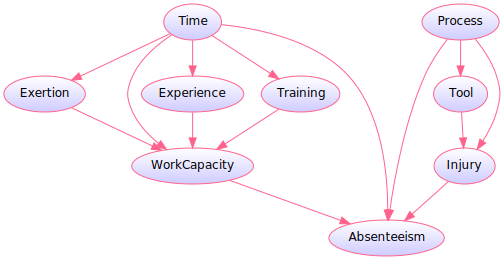

In [6]:

carModel: BayesianModel = BayesianModel([
    (Exertion.var, WorkCapacity.var),
    (Experience.var, WorkCapacity.var),
    (Training.var, WorkCapacity.var),
    (WorkCapacity.var, Absenteeism.var),

    (Time.var, WorkCapacity.var),
    (Time.var, Absenteeism.var),
    (Time.var, Exertion.var),
    (Time.var, Experience.var),
    (Time.var, Training.var),

    (Process.var, Tool.var),
    (Tool.var, Injury.var),
    (Process.var, Injury.var),
    (Process.var, Absenteeism.var),
    (Injury.var, Absenteeism.var)
])


drawGraph(model = carModel)

## Step 3: Estimate CPDs

In [7]:
from pgmpy.estimators import BayesianEstimator

#est: BayesianEstimator = BayesianEstimator(model = carModel, data = data)

assert carModel.get_cpds() == [], "Check cpds are empty beforehand"

carModel.fit(data, estimator = BayesianEstimator,
             prior_type = "BDeu",
             equivalent_sample_size = 10)

In [8]:
conditionalDistDf(carModel, query= Time)

,
Time,
1,0.033333
2,0.033333
3,0.033333
4,0.033333
5,0.033333
6,0.033333
7,0.033333
8,0.033333
9,0.033333


In [9]:
conditionalDistDf(carModel, query= Process)

,
Process,
Engine-Mount,0.333333
Engine-Wiring,0.432234
Oil-Fill,0.234432


In [10]:
conditionalDistDf(carModel, query= Tool)

Tool,Forklift,Front-Right-Door,Oil,Power-Gun
Process,,,,
Engine-Mount,0.991758,0.002747,0.002747,0.002747
Engine-Wiring,0.002119,0.002119,0.002119,0.993644
Oil-Fill,0.003906,0.425781,0.566406,0.003906


In [11]:
conditionalDistDf(carModel, query= Experience)

Experience,High,Low,Medium
Time,,,
1,0.003663,0.992674,0.003663
2,0.003663,0.992674,0.003663
3,0.003663,0.992674,0.003663
4,0.003663,0.003663,0.992674
5,0.003663,0.003663,0.992674
6,0.003663,0.992674,0.003663
7,0.003663,0.992674,0.003663
8,0.003663,0.992674,0.003663
9,0.003663,0.992674,0.003663


In [12]:
conditionalDistDf(carModel, query= WorkCapacity)

WorkCapacity                           High       Low    Medium
Exertion Experience Time Training                              
High     High       1    High      0.333333  0.333333  0.333333
                         Low       0.333333  0.333333  0.333333
                         Medium    0.333333  0.333333  0.333333
                    2    High      0.333333  0.333333  0.333333
                         Low       0.333333  0.333333  0.333333
...                                     ...       ...       ...
Medium   Medium     29   Low       0.333333  0.333333  0.333333
                         Medium    0.333333  0.333333  0.333333
                    30   High      0.333333  0.333333  0.333333
                         Low       0.333333  0.333333  0.333333
                         Medium    0.333333  0.333333  0.333333

[810 rows x 3 columns]

In [13]:
conditionalDistDf(carModel, query= Injury)

Injury                          Chemical-Burn  Contact-Contusion  \
Process       Tool                                                 
Engine-Mount  Forklift               0.499307           0.299861   
              Front-Right-Door       0.250000           0.250000   
              Oil                    0.250000           0.250000   
              Power-Gun              0.250000           0.250000   
Engine-Wiring Forklift               0.250000           0.250000   
              Front-Right-Door       0.250000           0.250000   
              Oil                    0.250000           0.250000   
              Power-Gun              0.000533           0.000533   
Oil-Fill      Forklift               0.250000           0.250000   
              Front-Right-Door       0.993119           0.002294   
              Oil                    0.994828           0.001724   
              Power-Gun              0.250000           0.250000   

Injury                          Electrical-Shock  Fall-Gtm  
Process       Tool                                          
Engine-Mount  Forklift                  0.000693  0.200139  
              Front-Right-Door          0.250000  0.250000  
              Oil                       0.250000  0.250000  
              Power-Gun                 0.250000  0.250000  
Engine-Wiring Forklift                  0.250000  0.250000  
              Front-Right-Door          0.250000  0.250000  
              Oil                       0.250000  0.250000  
              Power-Gun                 0.537846  0.461087  
Oil-Fill      Forklift                  0.250000  0.250000  
              Front-Right-Door          0.002294  0.002294  
              Oil                       0.001724  0.001724  
              Power-Gun                 0.250000  0.250000

In [14]:
conditionalDistDf(carModel, query= Absenteeism)





Absenteeism                                       High       Low    Medium
Injury        Process      Time WorkCapacity                              
Chemical-Burn Engine-Mount 1    High          0.000616  0.998768  0.000616
                                Low           0.333333  0.333333  0.333333
                                Medium        0.333333  0.333333  0.333333
                           2    High          0.333333  0.333333  0.333333
                                Low           0.333333  0.333333  0.333333
...                                                ...       ...       ...
Fall-Gtm      Oil-Fill     29   Low           0.333333  0.333333  0.333333
                                Medium        0.333333  0.333333  0.333333
                           30   High          0.333333  0.333333  0.333333
                                Low           0.333333  0.333333  0.333333
                                Medium        0.333333  0.333333  0.333333

[1080 rows x 3 columns]

## Step 4: Inference in Bayesian Car Model

Now let us verify active trails or independencies, for each kind of chain (causal, evidential, common cause, and common evidence) that can be found along the paths of the car model graph

### 1/ Causal Reasoning in the Car Model
For a causal model $A \rightarrow B \rightarrow C$, there are two cases:
  * **Marginal Dependence:** ($B$ unknown): When $B$ is unknown / unobserved, there is an active trail between $A$ and $C$, meaning the probability of $A$ can influence probability of $C$ (and vice versa). We can say $P(A) \ne P(A \; | \; C)$
  * **Conditional Independence:** ($B$ fixed): When $B$ is fixed, there is NO active trail between $A$ and $C$, so they are independent, which means the probability of $A$ won't influence probability of $C$ (and vice versa). We can say $P(A) = P(A \; | \; C)$

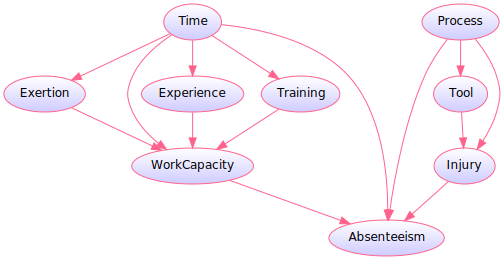

In [15]:
drawGraph(carModel)

#### Testing conditional independence:
$$
\color{DodgerBlue}{\text{WorkCapacity (observed)}: \;\;\;\;\;\;\;  \text{Experience} \; \bot \; \text{Absenteeism} \; | \; \text{WorkCapacity}}
$$

Given that **WorkCapacity**'s state is observed, we can make the following equivalent statements:
* there is NO active trail between **Experience** and **Absenteeism**.
* **Experience** and **Absenteeism** are locally independent.
* the probability of **Experience** won't influence probability of **Absenteeism** (and vice versa).


In [16]:
elim: VariableElimination = VariableElimination(model = carModel)

**Testing Conditional Independence:** Using Active Trails Methods

In [17]:
assert carModel.is_active_trail(start = Experience.var, end = Absenteeism.var, observed = None)

assert carModel.is_active_trail(start = Experience.var, end = Absenteeism.var, observed = [WorkCapacity.var]), "Check: still need to condition on extra variable for this not to be an active trail"

# Finding out which extra variable to condition on:
# TODO OBSERVEDVARS: must fix observedvars function so that (assuming causal chain) it can identify in the graph what is the middle node between these passed 'start' and 'end' nodes and also include that middle node in the output list (along with existing backdoors)
observedVars(carModel, start= Experience, end= Absenteeism)
assert observedVars(carModel, start= Experience, end= Absenteeism) == [{Time.var, WorkCapacity.var}], "Check: all list of extra variables to condition on to nullify active trail between Experience and Absenteeism"

# Check trail is nullified
assert not carModel.is_active_trail(start = Experience.var, end = Absenteeism.var, observed =[WorkCapacity.var] + [Time.var]), "Check: active trail between Experience and Absenteeism is nullified with the extra variable observed"

# See, there is no active trail from Experience to Absenteeism when observing WorkCapacity and time.
showActiveTrails(carModel, variables = [Experience, Absenteeism], observed = [WorkCapacity, Time])

Experience --> Exertion
Experience --> Training
Absenteeism --> Tool
Absenteeism --> Injury
Absenteeism --> Process


**Testing Conditional Independence:** Using Probabilities

In [18]:
OBS_STATE_WORKCAPACITY: State = 'Low'
OBS_STATE_TIME: int = 23

backdoorStates: Dict[Name, State] = {Time.var: OBS_STATE_TIME, WorkCapacity.var : OBS_STATE_WORKCAPACITY }


EWA: DiscreteFactor = elim.query(variables = [Absenteeism.var],
                                 evidence = backdoorStates)

EWA_1: DiscreteFactor = elim.query(variables = [Absenteeism.var],
                                   evidence = backdoorStates |o| {Experience.var : 'High'})

EWA_2: DiscreteFactor = elim.query(variables = [Absenteeism.var],
                                   evidence = backdoorStates |o| {Experience.var : 'Medium'})

EWA_3: DiscreteFactor = elim.query(variables = [Absenteeism.var],
                                   evidence = backdoorStates |o| {Experience.var : 'Low'})

print(EWA)

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2927.28it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: Injury:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: Tool:   0%|          | 0/6 [00:00<?, ?it/s]  

Eliminating: Process:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: Exertion:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: Experience:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: Training:   0%|          | 0/6 [00:00<?, ?it/s]  

Eliminating: Training: 100%|██████████| 6/6 [00:00<00:00, 519.82it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/5 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 5/5 [00:00<00:00, 2624.72it/s]


  0%|          | 0/5 [00:00<?, ?it/s]

Eliminating: Injury:   0%|          | 0/5 [00:00<?, ?it/s]

Eliminating: Tool:   0%|          | 0/5 [00:00<?, ?it/s]  

Eliminating: Process:   0%|          | 0/5 [00:00<?, ?it/s]

Eliminating: Exertion:   0%|          | 0/5 [00:00<?, ?it/s]

Eliminating: Training:   0%|          | 0/5 [00:00<?, ?it/s]

Eliminating: Training: 100%|██████████| 5/5 [00:00<00:00, 519.47it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/5 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 5/5 [00:00<00:00, 1614.19it/s]


  0%|          | 0/5 [00:00<?, ?it/s]

Eliminating: Injury:   0%|          | 0/5 [00:00<?, ?it/s]

Eliminating: Tool:   0%|          | 0/5 [00:00<?, ?it/s]  

Eliminating: Process:   0%|          | 0/5 [00:00<?, ?it/s]

Eliminating: Exertion:   0%|          | 0/5 [00:00<?, ?it/s]

Eliminating: Training:   0%|          | 0/5 [00:00<?, ?it/s]

Eliminating: Training: 100%|██████████| 5/5 [00:00<00:00, 265.89it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/5 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 5/5 [00:00<00:00, 2619.48it/s]


  0%|          | 0/5 [00:00<?, ?it/s]

Eliminating: Injury:   0%|          | 0/5 [00:00<?, ?it/s]

Eliminating: Tool:   0%|          | 0/5 [00:00<?, ?it/s]  

Eliminating: Process:   0%|          | 0/5 [00:00<?, ?it/s]

Eliminating: Exertion:   0%|          | 0/5 [00:00<?, ?it/s]

Eliminating: Training:   0%|          | 0/5 [00:00<?, ?it/s]

Eliminating: Training: 100%|██████████| 5/5 [00:00<00:00, 522.64it/s]

+---------------------+--------------------+
| Absenteeism         |   phi(Absenteeism) |
+=====================+====================+
| Absenteeism(High)   |             0.4989 |
+---------------------+--------------------+
| Absenteeism(Low)    |             0.3994 |
+---------------------+--------------------+
| Absenteeism(Medium) |             0.1017 |
+---------------------+--------------------+


The probabilities above are stated formulaically as follows:

$$
\begin{array}{ll}
P(\text{Absenteeism} = \text{High} \; | \; \Big\{  \text{WorkCapacity} = \text{Low} \; \cap \; \text{Time} = 23  \Big\}) \\
= P(\text{Absenteeism} = \text{High} \; | \; \Big\{\text{WorkCapacity} = \text{Low} \; \cap \; \text{Time} = 23 \Big\} \; \cap \; \text{Experience} = \text{Low})  \\
= P(\text{Absenteeism} = \text{High} \; | \; \Big\{\text{WorkCapacity} = \text{Low} \; \cap \; \text{Time} = 23 \Big\} \; \cap \; \text{Experience} = \text{Medium}) \\
= P(\text{Absenteeism} = \text{High} \; | \; \Big\{\text{WorkCapacity} = \text{Low} \; \cap \; \text{Time} = 23 \Big\} \; \cap \; \text{Experience} = \text{High}) \\
= 0.4989
\end{array}
$$
$$
\begin{array}{ll}
P(\text{Absenteeism} = \text{Low} \; | \; \Big\{\text{WorkCapacity} = \text{Low} \; \cap \; \text{Time} = 23 \Big\}) \\
= P(\text{Absenteeism} = \text{Low} \; | \; \Big\{\text{WorkCapacity} = \text{Low} \; \cap \; \text{Time} = 23 \Big\} \; \cap \; \text{Experience} = \text{Low})  \\
= P(\text{Absenteeism} = \text{Low} \; | \; \Big\{\text{WorkCapacity} = \text{Low} \; \cap \; \text{Time} = 23 \Big\} \; \cap \; \text{Experience} = \text{Medium}) \\
= P(\text{Absenteeism} = \text{Low} \; | \; \Big\{\text{WorkCapacity} = \text{Low} \; \cap \; \text{Time} = 23 \Big\} \; \cap \; \text{Experience} = \text{High}) \\
= 0.3994
\end{array}
$$
$$
\begin{array}{ll}
P(\text{Absenteeism} = \text{Medium} \; | \; \Big\{\text{WorkCapacity} = \text{Low} \; \cap \; \text{Time} = 23 \Big\}) \\
= P(\text{Absenteeism} = \text{Medium} \; | \; \Big\{\text{WorkCapacity} = \text{Low} \; \cap \; \text{Time} = 23 \Big\} \; \cap \; \text{Experience} = \text{Low})  \\
= P(\text{Absenteeism} = \text{Medium} \; | \; \Big\{\text{WorkCapacity} = \text{Low} \; \cap \; \text{Time} = 23 \Big\} \; \cap \; \text{Experience} = \text{Medium}) \\
= P(\text{Absenteeism} = \text{Medium} \; | \; \Big\{\text{WorkCapacity} = \text{Low} \; \cap \; \text{Time} = 23 \Big\} \; \cap \; \text{Experience} = \text{High}) \\
= 0.1017
\end{array}
$$

Since all the above stated probabilities are equal for each state of `Absenteeism` = `Low`, `Medium`, `High`, we can assert that the random variables `Experience` and `Absenteeism` are independent of each other, when observing `WorkCapacity` state (and also observing the state of `Time` to adjust for backdoors). Arbitrarily choosing the states `backdoorStates` = `{WorkCapacity = Low, Time = 23}`, we can write:
$$
P(\text{Absenteeism} \; | \; \{\texttt{backdoorStates} \}) = P(\text{Absenteeism} \; | \; \{ \texttt{backdoorStates} \} \; \cap \; \text{Experience})
$$

In [19]:
assert allEqual(EWA.values, EWA_1.values, EWA_2.values, EWA_3.values), "Check: the random variables Experience and Absenteeism are independent, when intermediary node WorkCapacity is observed (while accounting for backdoors)"


#Causal:  Experience ---> WorkCapacity --> Absenteeism
backdoorStateSet: Dict[Name, Set[State]] = {WorkCapacity.var : {OBS_STATE_WORKCAPACITY}, Time.var : {OBS_STATE_TIME}}


dfEWA: DataFrame = eliminateSlice(carModel, query = Absenteeism,
                                  evidence = backdoorStateSet |s| {Experience.var : Experience.states})

dfEWA






,,Absenteeism,High,Low,Medium
Experience,Time,WorkCapacity,,,
High,23,Low,0.498922,0.399355,0.101723
Medium,23,Low,0.498922,0.399355,0.101723
Low,23,Low,0.498922,0.399355,0.101723


#### Testing marginal dependence:
$$
\color{Green}{\text{WorkCapacity (unobserved)}: \;\;\;\;\;\;\;  \text{Experience} \longrightarrow \text{WorkCapacity} \longrightarrow \text{Absenteeism}}
$$
Given that **WorkCapacity**'s state is unobserved, we can make the following equivalent statements:
* there IS active trail between **Experience** and **Absenteeism**.
* **Experience** and **Absenteeism** are dependent.
* the probability of **Experience** influences probability of **Absenteeism** (and vice versa).


**Testing Marginal Dependence:** Using Active Trails Methods

In [20]:
assert carModel.is_active_trail(start = Experience.var, end = Absenteeism.var, observed = None)


# See, there is active trail from Experience to Absenteeism when not observing WorkCapacity variable
showActiveTrails(carModel, variables = [Experience, Absenteeism], observed = None)

Experience --> Absenteeism
Experience --> Time
Experience --> Exertion
Experience --> WorkCapacity
Experience --> Training
Absenteeism --> Time
Absenteeism --> Exertion
Absenteeism --> Experience
Absenteeism --> Process
Absenteeism --> WorkCapacity
Absenteeism --> Injury
Absenteeism --> Tool
Absenteeism --> Training


**Testing Marginal Dependence:** Using Probabilities

In [21]:

# TODO DIFFERENT plus HERE

OBS_STATE_TIME: int = 23

# TODO left off here: must make backdoor states type compatible with |plus| but also with elim.query() arguments
backdoorStates: Dict[Name, State] = {Time.var : OBS_STATE_TIME}

EA: DiscreteFactor = elim.query(variables = [Absenteeism.var],
                                evidence = backdoorStates)
print(EA)

  0%|          | 0/7 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/7 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 7/7 [00:00<00:00, 2873.65it/s]


  0%|          | 0/7 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/7 [00:00<?, ?it/s]

Eliminating: Injury:   0%|          | 0/7 [00:00<?, ?it/s]      

Eliminating: Injury:  29%|██▊       | 2/7 [00:00<00:00, 11.00it/s]

Eliminating: Tool:  29%|██▊       | 2/7 [00:00<00:00, 11.00it/s]  

Eliminating: Process:  29%|██▊       | 2/7 [00:00<00:00, 11.00it/s]

Eliminating: Exertion:  29%|██▊       | 2/7 [00:00<00:00, 11.00it/s]

Eliminating: Experience:  29%|██▊       | 2/7 [00:00<00:00, 11.00it/s]

Eliminating: Training:  29%|██▊       | 2/7 [00:00<00:00, 11.00it/s]  

Eliminating: Training: 100%|██████████| 7/7 [00:00<00:00, 31.75it/s]

+---------------------+--------------------+
| Absenteeism         |   phi(Absenteeism) |
+=====================+====================+
| Absenteeism(High)   |             0.4965 |
+---------------------+--------------------+
| Absenteeism(Low)    |             0.3984 |
+---------------------+--------------------+
| Absenteeism(Medium) |             0.1052 |
+---------------------+--------------------+


In [22]:
EA_1: DiscreteFactor = elim.query(variables = [Absenteeism.var],
                                  evidence = backdoorStates |o| {Experience.var : 'High'})
print(EA_1)

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2295.52it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: Injury:   0%|          | 0/6 [00:00<?, ?it/s]      

Eliminating: Tool:   0%|          | 0/6 [00:00<?, ?it/s]  

Eliminating: Process:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: Exertion:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: Training:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: Training: 100%|██████████| 6/6 [00:00<00:00, 88.69it/s]

+---------------------+--------------------+
| Absenteeism         |   phi(Absenteeism) |
+=====================+====================+
| Absenteeism(High)   |             0.4973 |
+---------------------+--------------------+
| Absenteeism(Low)    |             0.3987 |
+---------------------+--------------------+
| Absenteeism(Medium) |             0.1040 |
+---------------------+--------------------+


In [23]:
EA_2: DiscreteFactor = elim.query(variables = [Absenteeism.var],
                                  evidence = backdoorStates |o| {Experience.var : 'Medium'})
print(EA_2)

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 1740.13it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: Injury:   0%|          | 0/6 [00:00<?, ?it/s]      

Eliminating: Tool:   0%|          | 0/6 [00:00<?, ?it/s]  

Eliminating: Process:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: Exertion:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: Training:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: Training: 100%|██████████| 6/6 [00:00<00:00, 74.93it/s]

+---------------------+--------------------+
| Absenteeism         |   phi(Absenteeism) |
+=====================+====================+
| Absenteeism(High)   |             0.3885 |
+---------------------+--------------------+
| Absenteeism(Low)    |             0.3553 |
+---------------------+--------------------+
| Absenteeism(Medium) |             0.2561 |
+---------------------+--------------------+


In [24]:
EA_3: DiscreteFactor = elim.query(variables = [Absenteeism.var],
                                  evidence = backdoorStates |o| {Experience.var : 'Low'})
print(EA_3)

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2220.78it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: Injury:   0%|          | 0/6 [00:00<?, ?it/s]      

Eliminating: Tool:   0%|          | 0/6 [00:00<?, ?it/s]  

Eliminating: Process:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: Process:  67%|██████▋   | 4/6 [00:00<00:00, 39.68it/s]

Eliminating: Exertion:  67%|██████▋   | 4/6 [00:00<00:00, 39.68it/s]

Eliminating: Training:  67%|██████▋   | 4/6 [00:00<00:00, 39.68it/s]

Eliminating: Training: 100%|██████████| 6/6 [00:00<00:00, 55.36it/s]

+---------------------+--------------------+
| Absenteeism         |   phi(Absenteeism) |
+=====================+====================+
| Absenteeism(High)   |             0.3885 |
+---------------------+--------------------+
| Absenteeism(Low)    |             0.3553 |
+---------------------+--------------------+
| Absenteeism(Medium) |             0.2561 |
+---------------------+--------------------+


The probabilities above are stated formulaically as follows:
$$
\begin{array}{ll}
P(\text{Absenteeism} = \text{High} \; | \; \Big\{ \text{Time} = 23  \Big\}) = 0.4965 \\
\ne P(\text{Absenteeism} = \text{High} \; | \; \Big\{\text{Time} = 23 \Big\} \; \cap \; \text{Experience} = \text{Low}) = 0.3885  \\
\ne P(\text{Absenteeism} = \text{High} \; | \; \Big\{\text{Time} = 23 \Big\} \; \cap \; \text{Experience} = \text{Medium}) = 0.3885 \\
\ne P(\text{Absenteeism} = \text{High} \; | \; \Big\{\text{Time} = 23 \Big\} \; \cap \; \text{Experience} = \text{High}) = 0.4973
\end{array}
$$
$$
\begin{array}{ll}
P(\text{Absenteeism} = \text{Low} \; | \; \Big\{ \text{Time} = 23  \Big\}) = 0.4965 \\
\ne P(\text{Absenteeism} = \text{Low} \; | \; \Big\{\text{Time} = 23 \Big\} \; \cap \; \text{Experience} = \text{Low}) = 0.3553 \\
\ne P(\text{Absenteeism} = \text{Low} \; | \; \Big\{\text{Time} = 23 \Big\} \; \cap \; \text{Experience} = \text{Medium}) = 0.3553 \\
\ne P(\text{Absenteeism} = \text{Low} \; | \; \Big\{\text{Time} = 23 \Big\} \; \cap \; \text{Experience} = \text{High}) = 0.3987
\end{array}
$$
$$
\begin{array}{ll}
P(\text{Absenteeism} = \text{Medium} \; | \; \Big\{ \text{Time} = 23  \Big\}) = 0.4965 \\
\ne P(\text{Absenteeism} = \text{Medium} \; | \; \Big\{\text{Time} = 23 \Big\} \; \cap \; \text{Experience} = \text{Low}) = 0.2561 \\
\ne P(\text{Absenteeism} = \text{Medium} \; | \; \Big\{\text{Time} = 23 \Big\} \; \cap \; \text{Experience} = \text{Medium}) = 0.2561 \\
\ne P(\text{Absenteeism} = \text{Medium} \; | \; \Big\{\text{Time} = 23 \Big\} \; \cap \; \text{Experience} = \text{High}) = 0.1040
\end{array}
$$

Since not all the above stated probabilities are equal for each state of `Absenteeism` = `Low`, `Medium`, `High`, we can assert that the random variables `Experience` and `Absenteeism` are dependent of each other, when not observing `WorkCapacity` state (while  observing the state of `Time` to adjust for backdoors). Arbitrarily choosing the state `backdoorStates` = `{Time = 23}`, we can write:
$$
P(\text{Absenteeism} \; | \; \{\texttt{backdoorStates} \}) \ne P(\text{Absenteeism} \; | \; \{ \texttt{backdoorStates} \} \; \cap \; \text{Experience})
$$

In [25]:

assert not allEqual(EA.values, EA_1.values, EA_2.values, EA_3.values), "Check: the random variables Experience and Absenteeism are dependent, when intermediary node WorkCapacity is NOT observed (while accounting for backdoors)"



backdoorStateSet: Dict[Name, Set[State]] = {Time.var : {OBS_STATE_TIME}}

dfEA = eliminateSlice(carModel, query = Absenteeism,
                      evidence = backdoorStateSet |s| {Experience.var : Experience.states})
dfEA

,Absenteeism,High,Low,Medium
Experience,Time,,,
High,23,0.497266,0.398695,0.10404
Medium,23,0.388529,0.355341,0.25613
Low,23,0.388529,0.355341,0.25613


### Causal Reasoning: Experience - Absenteeism Effect
Since the probabilities of `Absenteeism = High` are NOT the same, across all varying conditions of `Time` and `Experience`, this means that there is an active trail between `Experience` and `Absenteeism`.

In [26]:
backdoorStateSet: Dict[Name, Set[State]] = {Time.var : {2, 15 , 30}}

dfEA: DataFrame = eliminateSlice(carModel, query = Absenteeism,
                                 evidence = backdoorStateSet |s| {Experience.var : Experience.states})
dfEA

Absenteeism          High       Low   Medium
Experience Time                             
High       2     0.388529  0.355341  0.25613
           30    0.497266  0.398695  0.10404
           15    0.497266  0.398695  0.10404
Medium     2     0.388529  0.355341  0.25613
           30    0.388529  0.355341  0.25613
           15    0.388529  0.355341  0.25613
Low        2     0.497266  0.398695  0.10404
           30    0.388529  0.355341  0.25613
           15    0.388529  0.355341  0.25613

### Causal Reasoning: Exertion - Absenteeism Effect
Since the probabilities of `Absenteeism = High` are NOT the same, across all varying conditions of `Time` and `Exertion`, this means that there is an active trail between `Exertion` and `Absenteeism`.

In [27]:
backdoorStateSet: Dict[Name, Set[State]] = {Time.var : {2, 15, 30}}

dfXA: DataFrame = eliminateSlice(carModel, query = Absenteeism,
                                 evidence = backdoorStateSet |s| {Exertion.var : Exertion.states})
dfXA

Absenteeism        High       Low   Medium
Exertion Time                             
High     2     0.388529  0.355341  0.25613
         30    0.497266  0.398695  0.10404
         15    0.497266  0.398695  0.10404
Medium   2     0.388529  0.355341  0.25613
         30    0.388529  0.355341  0.25613
         15    0.388529  0.355341  0.25613
Low      2     0.497266  0.398695  0.10404
         30    0.388529  0.355341  0.25613
         15    0.388529  0.355341  0.25613

### Causal Reasoning: Training - Absenteeism Effect
Since the probabilities of `Absenteeism = High` are NOT the same, across all varying conditions of `Time` and `Training`, this means that there is an active trail between `Training` and `Absenteeism`.

In [28]:
backdoorStateSet: Dict[Name, Set[State]] = {Time.var : {2, 15, 30}}


dfTA: DataFrame = eliminateSlice(carModel, query = Absenteeism,
                                 evidence = backdoorStateSet |s| {Training.var : Training.states})
dfTA

Absenteeism        High       Low   Medium
Time Training                             
2    High      0.388529  0.355341  0.25613
     Medium    0.388529  0.355341  0.25613
     Low       0.497266  0.398695  0.10404
30   High      0.497266  0.398695  0.10404
     Medium    0.388529  0.355341  0.25613
     Low       0.388529  0.355341  0.25613
15   High      0.497266  0.398695  0.10404
     Medium    0.388529  0.355341  0.25613
     Low       0.388529  0.355341  0.25613

### Causal Reasoning: Experience / Exertion / Training - Absenteeism

In [29]:

#carModel.is_active_trail(start = [Exertion.var, Training.var, Experience.var], end = Absenteeism.var)
backdoorStateSet: Dict[Name, Set[State]] = {Time.var : {2, 30}}

dfEETA: DataFrame = eliminateSlice(carModel,
                                   query = Absenteeism,
                                   evidence = backdoorStateSet |s| {Exertion.var : Exertion.states,
                                                                     Training.var : Training.states,
                                                                     Experience.var : Experience.states})
dfEETA

















Absenteeism                            High       Low    Medium
Exertion Experience Time Training                              
High     High       2    High      0.388529  0.355341  0.256130
                         Medium    0.388529  0.355341  0.256130
                         Low       0.388529  0.355341  0.256130
                    30   High      0.498876  0.399337  0.101786
                         Medium    0.388529  0.355341  0.256130
                         Low       0.388529  0.355341  0.256130
         Medium     2    High      0.388529  0.355341  0.256130
                         Medium    0.388529  0.355341  0.256130
                         Low       0.388529  0.355341  0.256130
                    30   High      0.388529  0.355341  0.256130
                         Medium    0.388529  0.355341  0.256130
                         Low       0.388529  0.355341  0.256130
         Low        2    High      0.388529  0.355341  0.256130
                         Medium    0.388529  0.355341  0.256130
                         Low       0.388529  0.355341  0.256130
                    30   High      0.388529  0.355341  0.256130
                         Medium    0.388529  0.355341  0.256130
                         Low       0.388529  0.355341  0.256130
Medium   High       2    High      0.388529  0.355341  0.256130
                         Medium    0.388529  0.355341  0.256130
                         Low       0.388529  0.355341  0.256130
                    30   High      0.388529  0.355341  0.256130
                         Medium    0.388529  0.355341  0.256130
                         Low       0.388529  0.355341  0.256130
         Medium     2    High      0.388529  0.355341  0.256130
                         Medium    0.388529  0.355341  0.256130
                         Low       0.388529  0.355341  0.256130
                    30   High      0.388529  0.355341  0.256130
                         Medium    0.388529  0.355341  0.256130
                         Low       0.388529  0.355341  0.256130
         Low        2    High      0.388529  0.355341  0.256130
                         Medium    0.388529  0.355341  0.256130
                         Low       0.388529  0.355341  0.256130
                    30   High      0.388529  0.355341  0.256130
                         Medium    0.388529  0.355341  0.256130
                         Low       0.388529  0.355341  0.256130
Low      High       2    High      0.388529  0.355341  0.256130
                         Medium    0.388529  0.355341  0.256130
                         Low       0.388529  0.355341  0.256130
                    30   High      0.388529  0.355341  0.256130
                         Medium    0.388529  0.355341  0.256130
                         Low       0.388529  0.355341  0.256130
         Medium     2    High      0.388529  0.355341  0.256130
                         Medium    0.388529  0.355341  0.256130
                         Low       0.388529  0.355341  0.256130
                    30   High      0.388529  0.355341  0.256130
                         Medium    0.388529  0.355341  0.256130
                         Low       0.388529  0.355341  0.256130
         Low        2    High      0.388529  0.355341  0.256130
                         Medium    0.388529  0.355341  0.256130
                         Low       0.498876  0.399337  0.101786
                    30   High      0.388529  0.355341  0.256130
                         Medium    0.388529  0.355341  0.256130
                         Low       0.388529  0.355341  0.256130

### 4/ Inter-Causal Reasoning in the Car Model (Common Effect Chains)
For a common effect model $A \rightarrow B \leftarrow C$, there are two cases:
  * **Marginal Independence:** ($B$ unknown): When $B$ is unknown / unobserved, there is NO active trail between $A$ and $C$, so they are independent, which means the probability of $A$ won't influence probability of $C$ (and vice versa). We can say $P(A) = P(A \; | \; C)$
  * **Conditional Dependence:** ($B$ fixed): When $B$ is fixed, there IS an active trail between $A$ and $C$, meaning the probability of $A$ can influence probability of $C$ (and vice versa). We can say $P(A) \ne P(A \; | \; C)$

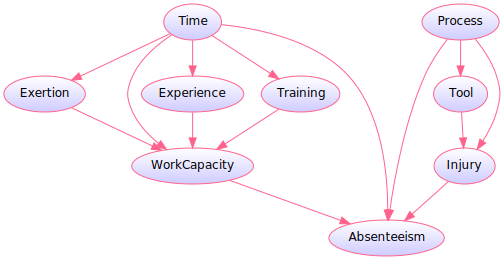

In [30]:
drawGraph(carModel)

#### Testing marginal independence:
$$
\color{DodgerBlue}{\text{WorkCapacity (unobserved)}: \;\;\;\;\;\;\;  \text{Exertion} \; \bot \; \text{Training}}
$$

Given that **WorkCapacity**'s state is NOT observed, we can make the following equivalent statements:
* there is NO active trail between **Exertion** and **Training**.
* **Exertion** and **Training** are locally independent.
* the probability of **Exertion** won't influence probability of **Training** (and vice versa).


**Testing Marginal Independence:** Using Active Trails Methods

In [31]:
# When NOT observing the state of the middle node, there is NO active trail (but need to bserve the Time var state because this is a backdoor)
assert not carModel.is_active_trail(start = Exertion.var, end = Training.var, observed = [Time.var])

# When observing the state, there is IS an active trail (also must always account for the backdoor, Time)
assert carModel.is_active_trail(start = Exertion.var, end = Training.var, observed = [WorkCapacity.var, Time.var])

assert carModel.is_active_trail(start = Exertion.var, end = Training.var, observed = [WorkCapacity.var]), "Check: still need to condition on extra variable for this not to be an active trail"

In [32]:
# Finding out which extra variable to condition on: this is the backdoor
# TODO problem here returning Time Time twice!
observedVars(carModel, start= Exertion, end= Training)
assert observedVars(carModel, start= Exertion, end= Training) == [{'Time'}], "Check: all list of extra variables (backdoors) to condition on to ACTIVATE active trail between Exertion and Training"


# See, there is no active trail from Exertion to Training when not observing WorkCapacity.
showActiveTrails(carModel, variables = [Exertion, Training], observed = [Time])

Exertion --> Absenteeism
Exertion --> WorkCapacity
Training --> Absenteeism
Training --> WorkCapacity


In [33]:

# See, there IS active trail from Exertion to Training when observing WorkCapacity.
showActiveTrails(carModel, variables = [Exertion, Training], observed = [WorkCapacity, Time])

Exertion --> Experience
Exertion --> Training
Training --> Exertion
Training --> Experience


**Testing Marginal Independence:** Using Probabilities

In [34]:
# OBS_STATE_WORKCAPACITY: State = 'Low' # remember, not observing the state of the middle node.
OBS_STATE_TIME: int = 23

# TODO DIFFERENT plus HERE
backdoorStates: Dict[Name, State] = {Time.var : OBS_STATE_TIME}
backdoorStateSet: Dict[Name, Set[State]] = {Time.var : {OBS_STATE_TIME}}

TE: DiscreteFactor = elim.query(variables = [Exertion.var], evidence = backdoorStates)

TE_1: DiscreteFactor = elim.query(variables = [Exertion.var],
                                  evidence = backdoorStates |o| {Training.var : 'High'})

TE_2: DiscreteFactor = elim.query(variables = [Exertion.var],
                                  evidence = backdoorStates |o| {Training.var : 'Medium'})

TE_3: DiscreteFactor = elim.query(variables = [Exertion.var],
                                  evidence = backdoorStates |o| {Training.var : 'Low'})
print(TE)



  0%|          | 0/7 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/7 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 7/7 [00:00<00:00, 3249.60it/s]


  0%|          | 0/7 [00:00<?, ?it/s]

Eliminating: Absenteeism:   0%|          | 0/7 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/7 [00:00<?, ?it/s]

Eliminating: Injury:   0%|          | 0/7 [00:00<?, ?it/s]      

Eliminating: Process:   0%|          | 0/7 [00:00<?, ?it/s]

Eliminating: Tool:   0%|          | 0/7 [00:00<?, ?it/s]   

Eliminating: Experience:   0%|          | 0/7 [00:00<?, ?it/s]

Eliminating: Training:   0%|          | 0/7 [00:00<?, ?it/s]  

Eliminating: Training: 100%|██████████| 7/7 [00:00<00:00, 88.04it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 3796.32it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: Absenteeism:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: Injury:   0%|          | 0/6 [00:00<?, ?it/s]      

Eliminating: Process:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: Tool:   0%|          | 0/6 [00:00<?, ?it/s]   

Eliminating: Experience:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: Experience: 100%|██████████| 6/6 [00:00<00:00, 197.21it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 3006.31it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: Absenteeism:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: Injury:   0%|          | 0/6 [00:00<?, ?it/s]      

Eliminating: Process:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: Tool:   0%|          | 0/6 [00:00<?, ?it/s]   

Eliminating: Experience:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: Experience: 100%|██████████| 6/6 [00:00<00:00, 184.56it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 1774.24it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: Absenteeism:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: Injury:   0%|          | 0/6 [00:00<?, ?it/s]      

Eliminating: Process:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: Tool:   0%|          | 0/6 [00:00<?, ?it/s]   

Eliminating: Experience:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: Experience: 100%|██████████| 6/6 [00:00<00:00, 142.77it/s]

+------------------+-----------------+
| Exertion         |   phi(Exertion) |
+==================+=================+
| Exertion(High)   |          0.9927 |
+------------------+-----------------+
| Exertion(Low)    |          0.0037 |
+------------------+-----------------+
| Exertion(Medium) |          0.0037 |
+------------------+-----------------+



The probabilities above are stated formulaically as follows:
$$
\begin{array}{ll}
P(\text{Exertion} = \text{High} \; | \; \Big\{ \text{Time} = 23  \Big\}) \\
= P(\text{Exertion} = \text{High} \; | \; \Big\{ \text{Time} = 23 \Big\} \; \cap \; \text{Training} = \text{Low})  \\
= P(\text{Exertion} = \text{High} \; | \; \Big\{ \text{Time} = 23 \Big\} \; \cap \; \text{Training} = \text{Medium}) \\
= P(\text{Exertion} = \text{High} \; | \; \Big\{\text{Time} = 23 \Big\} \; \cap \; \text{Training} = \text{High}) \\
= 0.9927
\end{array}
$$
$$
\begin{array}{ll}
P(\text{Exertion} = \text{Low} \; | \; \Big\{ \text{Time} = 23 \Big\}) \\
= P(\text{Exertion} = \text{Low} \; | \; \Big\{ \text{Time} = 23 \Big\} \; \cap \; \text{Training} = \text{Low})  \\
= P(\text{Exertion} = \text{Low} \; | \; \Big\{ \text{Time} = 23 \Big\} \; \cap \; \text{Training} = \text{Medium}) \\
= P(\text{Exertion} = \text{Low} \; | \; \Big\{\text{Time} = 23 \Big\} \; \cap \; \text{Training} = \text{High}) \\
= 0.0037
\end{array}
$$
$$
\begin{array}{ll}
P(\text{Exertion} = \text{Medium} \; | \; \Big\{ \text{Time} = 23 \Big\}) \\
= P(\text{Exertion} = \text{Medium} \; | \; \Big\{ \text{Time} = 23 \Big\} \; \cap \; \text{Training} = \text{Low})  \\
= P(\text{Exertion} = \text{Medium} \; | \; \Big\{ \text{Time} = 23 \Big\} \; \cap \; \text{Training} = \text{Medium}) \\
= P(\text{Exertion} = \text{Medium} \; | \; \Big\{ \text{Time} = 23 \Big\} \; \cap \; \text{Training} = \text{High}) \\
= 0.0037
\end{array}
$$

Since all the above stated probabilities are equal for each state of `Exertion` = `Low`, `Medium`, `High`, we can assert that the random variables `Training` and `Exertion` are independent of each other, when NOT observing `WorkCapacity` state (but also observing the state of `Time` to adjust for backdoors). Arbitrarily choosing the `backdoorStates` = `{Time = 23}`, we can write:
$$
P(\text{Exertion} \; | \; \{\texttt{backdoorStates} \}) = P(\text{Exertion} \; | \; \{ \texttt{backdoorStates} \} \; \cap \; \text{Training})
$$


In [35]:
assert allEqual(TE.values, TE_1.values, TE_2.values, TE_3.values), "Check: the random variables Exertion and Training are independent, when intermediary node WorkCapacity is NOT observed (while accounting for backdoors)"


backdoorStateSet: Dict[Name, Set[State]] = {Time.var: {OBS_STATE_TIME}} # , WorkCapacity.var : {OBS_STATE_WORKCAPACITY} }

dfTE = eliminateSlice(carModel, query = Exertion,
                       evidence = backdoorStateSet |s| {Training.var : Training.states})
dfTE



Exertion           High       Low    Medium
Time Training                              
23   High      0.992674  0.003663  0.003663
     Medium    0.992674  0.003663  0.003663
     Low       0.992674  0.003663  0.003663

#### Testing conditional dependence:
$$
\color{Chartreuse}{\text{WorkCapacity (observed)}: \;\;\;\;\;\;\;  \text{Exertion} \longrightarrow \text{WorkCapacity} \longrightarrow \text{Training}}
$$
$$
\color{LimeGreen}{\text{WorkCapacity (observed)}: \;\;\;\;\;\;\;  \text{Exertion} \longrightarrow \text{WorkCapacity} \longrightarrow \text{Training}}
$$
$$
\color{Green}{\text{WorkCapacity (observed)}: \;\;\;\;\;\;\;  \text{Exertion} \longrightarrow \text{WorkCapacity} \longrightarrow \text{Training}}
$$
Given that **WorkCapacity**'s state is observed, we can make the following equivalent statements:
* there IS active trail between **Exertion** and **Training**.
* **Exertion** and **Training** are dependent.
* the probability of **Exertion** influences probability of **Training** (and vice versa).


**Testing Conditional Dependence:** Using Active Trails Methods

In [36]:
assert carModel.is_active_trail(start = Exertion.var, end = Training.var, observed = [WorkCapacity.var, Time.var])

# See, there is active trail from Experience to Absenteeism when not observing WorkCapacity variable
showActiveTrails(carModel, variables = [Exertion, Training], observed = [WorkCapacity, Time])

Exertion --> Experience
Exertion --> Training
Training --> Exertion
Training --> Experience


**Testing Conditional Dependence:** Using Probabilities

In [37]:
OBS_STATE_WORKCAPACITY: State = 'Low'
OBS_STATE_TIME: int = 23

backdoorStates: Dict[Name, State] = {Time.var: OBS_STATE_TIME, WorkCapacity.var : OBS_STATE_WORKCAPACITY }

TWE: DiscreteFactor = elim.query(variables = [Exertion.var],
                                 evidence = backdoorStates)
print(TWE)

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 3124.64it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: Absenteeism:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: Injury:   0%|          | 0/6 [00:00<?, ?it/s]     

Eliminating: Process:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: Tool:   0%|          | 0/6 [00:00<?, ?it/s]   

Eliminating: Experience:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: Training:   0%|          | 0/6 [00:00<?, ?it/s]  

Eliminating: Training: 100%|██████████| 6/6 [00:00<00:00, 513.67it/s]

+------------------+-----------------+
| Exertion         |   phi(Exertion) |
+==================+=================+
| Exertion(High)   |          0.9975 |
+------------------+-----------------+
| Exertion(Low)    |          0.0012 |
+------------------+-----------------+
| Exertion(Medium) |          0.0012 |
+------------------+-----------------+


In [38]:

TWE_1: DiscreteFactor = elim.query(variables = [Exertion.var],
                                   evidence = backdoorStates |o| {Training.var : 'High'})
print(TWE_1)

  0%|          | 0/5 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/5 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 5/5 [00:00<00:00, 1863.64it/s]


  0%|          | 0/5 [00:00<?, ?it/s]

Eliminating: Absenteeism:   0%|          | 0/5 [00:00<?, ?it/s]

Eliminating: Injury:   0%|          | 0/5 [00:00<?, ?it/s]     

Eliminating: Process:   0%|          | 0/5 [00:00<?, ?it/s]

Eliminating: Tool:   0%|          | 0/5 [00:00<?, ?it/s]   

Eliminating: Experience:   0%|          | 0/5 [00:00<?, ?it/s]

Eliminating: Experience: 100%|██████████| 5/5 [00:00<00:00, 321.99it/s]

+------------------+-----------------+
| Exertion         |   phi(Exertion) |
+==================+=================+
| Exertion(High)   |          0.9975 |
+------------------+-----------------+
| Exertion(Low)    |          0.0012 |
+------------------+-----------------+
| Exertion(Medium) |          0.0012 |
+------------------+-----------------+


In [39]:
TWE_2: DiscreteFactor = elim.query(variables = [Exertion.var],
                                   evidence = backdoorStates |o| {Training.var : 'Medium'})
print(TWE_2)

  0%|          | 0/5 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/5 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 5/5 [00:00<00:00, 1335.17it/s]


  0%|          | 0/5 [00:00<?, ?it/s]

Eliminating: Absenteeism:   0%|          | 0/5 [00:00<?, ?it/s]

Eliminating: Injury:   0%|          | 0/5 [00:00<?, ?it/s]     

Eliminating: Process:   0%|          | 0/5 [00:00<?, ?it/s]

Eliminating: Tool:   0%|          | 0/5 [00:00<?, ?it/s]   

Eliminating: Experience:   0%|          | 0/5 [00:00<?, ?it/s]

Eliminating: Experience: 100%|██████████| 5/5 [00:00<00:00, 281.15it/s]

+------------------+-----------------+
| Exertion         |   phi(Exertion) |
+==================+=================+
| Exertion(High)   |          0.9927 |
+------------------+-----------------+
| Exertion(Low)    |          0.0037 |
+------------------+-----------------+
| Exertion(Medium) |          0.0037 |
+------------------+-----------------+


In [40]:
TWE_3: DiscreteFactor = elim.query(variables = [Exertion.var],
                                   evidence = backdoorStates |o| {Training.var : 'Low'})
print(TWE_3)

  0%|          | 0/5 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/5 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 5/5 [00:00<00:00, 905.86it/s]


  0%|          | 0/5 [00:00<?, ?it/s]

Eliminating: Absenteeism:   0%|          | 0/5 [00:00<?, ?it/s]

Eliminating: Injury:   0%|          | 0/5 [00:00<?, ?it/s]     

Eliminating: Process:   0%|          | 0/5 [00:00<?, ?it/s]

Eliminating: Tool:   0%|          | 0/5 [00:00<?, ?it/s]   

Eliminating: Experience:   0%|          | 0/5 [00:00<?, ?it/s]

Eliminating: Experience: 100%|██████████| 5/5 [00:00<00:00, 190.30it/s]

+------------------+-----------------+
| Exertion         |   phi(Exertion) |
+==================+=================+
| Exertion(High)   |          0.9927 |
+------------------+-----------------+
| Exertion(Low)    |          0.0037 |
+------------------+-----------------+
| Exertion(Medium) |          0.0037 |
+------------------+-----------------+



$$
\begin{array}{ll}
P(\text{Exertion} = \text{High} \; | \; \Big\{  \text{WorkCapacity} = \text{Low} \; \cap \; \text{Time} = 23  \Big\}) = 0.9975 \\
\ne P(\text{Exertion} = \text{High} \; | \; \Big\{\text{WorkCapacity} = \text{Low} \; \cap \; \text{Time} = 23 \Big\} \; \cap \; \text{Training} = \text{Low})  = 0.9927 \\
\ne P(\text{Exertion} = \text{High} \; | \; \Big\{\text{WorkCapacity} = \text{Low} \; \cap \; \text{Time} = 23 \Big\} \; \cap \; \text{Training} = \text{Medium}) = 0.9927 \\
\ne P(\text{Exertion} = \text{High} \; | \; \Big\{\text{WorkCapacity} = \text{Low} \; \cap \; \text{Time} = 23 \Big\} \; \cap \; \text{Training} = \text{High})  = 0.9975
\end{array}
$$
$$
\begin{array}{ll}
P(\text{Exertion} = \text{Low} \; | \; \Big\{\text{WorkCapacity} = \text{Low} \; \cap \; \text{Time} = 23 \Big\}) = 0.0012 \\
\ne P(\text{Exertion} = \text{Low} \; | \; \Big\{\text{WorkCapacity} = \text{Low} \; \cap \; \text{Time} = 23 \Big\} \; \cap \; \text{Training} = \text{Low})  = 0.0037 \\
\ne P(\text{Exertion} = \text{Low} \; | \; \Big\{\text{WorkCapacity} = \text{Low} \; \cap \; \text{Time} = 23 \Big\} \; \cap \; \text{Training} = \text{Medium}) = 0.0037 \\
\ne P(\text{Exertion} = \text{Low} \; | \; \Big\{\text{WorkCapacity} = \text{Low} \; \cap \; \text{Time} = 23 \Big\} \; \cap \; \text{Training} = \text{High}) = 0.0012
\end{array}
$$
$$
\begin{array}{ll}
P(\text{Exertion} = \text{Medium} \; | \; \Big\{\text{WorkCapacity} = \text{Low} \; \cap \; \text{Time} = 23 \Big\}) = 0.0012 \\
\ne P(\text{Exertion} = \text{Medium} \; | \; \Big\{\text{WorkCapacity} = \text{Low} \; \cap \; \text{Time} = 23 \Big\} \; \cap \; \text{Training} = \text{Low}) = 0.0037 \\
\ne P(\text{Exertion} = \text{Medium} \; | \; \Big\{\text{WorkCapacity} = \text{Low} \; \cap \; \text{Time} = 23 \Big\} \; \cap \; \text{Training} = \text{Medium}) = 0.0037 \\
\ne P(\text{Exertion} = \text{Medium} \; | \; \Big\{\text{WorkCapacity} = \text{Low} \; \cap \; \text{Time} = 23 \Big\} \; \cap \; \text{Training} = \text{High}) = 0.0012
\end{array}
$$

Since not all the above stated probabilities are equal for each state of `Exertion` = `Low`, `Medium`, `High`, we can assert that the random variables `Training` and `Exertion` are dependent, when observing `WorkCapacity` state (and also observing the state of `Time` to adjust for backdoors). Arbitrarily choosing the states `backdoorStates` = `{WorkCapacity = Low, Time = 23}`, we can write:
$$
P(\text{Exertion} \; | \; \{\texttt{backdoorStates} \}) \ne P(\text{Exertion} \; | \; \{ \texttt{backdoorStates} \} \; \cap \; \text{Training})
$$

In [41]:

assert not allEqual(TWE.values, TWE_1.values, TWE_2.values, TWE_3.values), "Check: the random variables Exertion and Training are dependent, when intermediary node WorkCapacity is observed (while accounting for backdoors)"


backdoorStateSet: Dict[Name, Set[State]] = {Time.var: {OBS_STATE_TIME}, WorkCapacity.var : {OBS_STATE_WORKCAPACITY} }

dfTWE = eliminateSlice(carModel, query = Exertion,
                       evidence = backdoorStateSet |s| {Training.var : Training.states})
dfTWE

Exertion                        High       Low    Medium
Time Training WorkCapacity                              
23   High     Low           0.997533  0.001233  0.001233
     Medium   Low           0.992674  0.003663  0.003663
     Low      Low           0.992674  0.003663  0.003663

### (2) Common Effect Reasoning: Exertion --> WorkCapacity <-- Training

In [42]:
dfTWE

Exertion                        High       Low    Medium
Time Training WorkCapacity                              
23   High     Low           0.997533  0.001233  0.001233
     Medium   Low           0.992674  0.003663  0.003663
     Low      Low           0.992674  0.003663  0.003663

### (4) Common Effect Reasoning: WorkCapacity --> Absenteeism <-- Time
$\color{red}{\text{TODO: CASE 4 is not working!}}$

In [43]:

# 4

observedVars(carModel, start = WorkCapacity, end = Time)

[{'WorkCapacity'}, {'Time'}]

In [44]:
# TODO why false?
carModel.is_active_trail(start = WorkCapacity.var, end = Time.var, observed = [WorkCapacity.var, Absenteeism.var])
# TODO why is this true even when there is NO observed var? Should be false when there is no middle node / backdoor observation:

False

In [45]:
carModel.is_active_trail(start = WorkCapacity.var, end = Time.var, observed = None)
# TODO problem with this (above) is that when we pass JUST Absenteeism (without backdoor workcapacity) then is_active_trail() yields TRUE also, but that is a false positive because we know TRUE is yielded when not observing state of Absenteeism, which should be incorrect for the common-effect model.

True

In [46]:
# Common Evidence: WorkCapacity ---> Absenteeism <---- Time
#backdoorStateSet: Dict[Name, Set[State]] = {WorkCapacity.var : {OBS_STATE_WORKCAPACITY}}

# NOTE: cannot use the same variable in evidence as the one in query so even though observedVars function returns workcapacity as one of the observed vars, the below method will complain if we put it in evidence ...so cannot account for "my backdoor guesses" here.

# TODO even here the same above problem is visible: when not including Absenteeism (middle node) there should be NO active trail between Time and WorkCapacity but still we see there are difference probabiliities of workcapacity states given varying levels of time so they seem dependent.
#inf = CausalInference(carModel)
#inf.get_all_backdoor_adjustment_sets(WorkCapacity.var, Time.var) # is empty

dfTW: DataFrame = eliminateSlice(carModel, query = WorkCapacity,
                                  evidence = {Time.var : {2, 15, 30}})
dfTW

WorkCapacity,High,Low,Medium
Time,,,
2,0.007407,0.007407,0.985187
30,0.007407,0.985187,0.007407
15,0.985187,0.007407,0.007407


In [47]:
# Here is the false positive (even if we include absenteeism the fake active trail is visible through the differing probabilities in workcapacity)
dfTAW: DataFrame = eliminateSlice(carModel, query = WorkCapacity,
                                  evidence = {Absenteeism.var : {'Low'}, Time.var : {2, 15, 30}})
dfTAW





WorkCapacity          High       Low    Medium
Absenteeism Time                              
Low         2     0.006197  0.006197  0.987605
            30    0.006197  0.987605  0.006197
            15    0.987605  0.006197  0.006197

### (5) Common Effect Reasoning: Time --> WorkCapacity <-- Exertion
$\color{red}{\text{TODO: CASE 5 is not working!}}$

In [48]:

# 5
observedVars(carModel, start = Time, end = Exertion)
observedVars(carModel, start = Exertion, end = Time)

inf = CausalInference(carModel)
inf.get_all_backdoor_adjustment_sets(Exertion.var, Time.var)
inf.get_all_backdoor_adjustment_sets(Time.var, Exertion.var)

frozenset()

In [49]:

# TODO why is this true even when there is NO observed var? Should be false when there is no middle node / backdoor observation:
carModel.is_active_trail(start = Exertion.var, end = Time.var, observed = None)

True

In [50]:
# TODO because above (previous) works with observed = None, the below is false positive!
carModel.is_active_trail(start = Exertion.var, end = Time.var, observed = [WorkCapacity.var])

True

In [51]:
# TODO all probs per exertion state must be the same (so probs along a column  must be the same, when not observing the middle node absenteeism)
dfTX: DataFrame = eliminateSlice(carModel, query = Exertion, evidence = {Time.var : {2, 15, 30}})
dfTX

Exertion,High,Low,Medium
Time,,,
2,0.003663,0.992674,0.003663
30,0.992674,0.003663,0.003663
15,0.992674,0.003663,0.003663


In [52]:
# TODO false positive here now because abvoe shows dependence not independence
dfTAX: DataFrame = eliminateSlice(carModel, query = Exertion,
                                  evidence = {Absenteeism.var : {'Low'}, Time.var : {2, 15, 30}})
dfTAX

Exertion              High       Low    Medium
Absenteeism Time                              
Low         2     0.003267  0.993465  0.003267
            30    0.993465  0.003267  0.003267
            15    0.993465  0.003267  0.003267

### (6) Common Effect Reasoning: Time --> WorkCapacity <-- Experience
$\color{red}{\text{TODO: CASE 6 is not working!}}$

### (7) Common Effect Reasoning: Time --> WorkCapacity <-- Training
$\color{red}{\text{TODO: CASE 7 is not working!}}$





### (9) Common Effect Reasoning: Process ---> Absenteeism <--- Injury
$\color{red}{\text{TODO: CASE 9 is not working!}}$

In [53]:

# 9
observedVars(carModel, start = Process, end = Injury)
observedVars(carModel, start = Injury, end = Process)

inf = CausalInference(carModel)
inf.get_all_backdoor_adjustment_sets(Injury.var, Process.var)
inf.get_all_backdoor_adjustment_sets(Process.var, Injury.var)

frozenset()

In [54]:

# TURE for common evidence model by default since there is no observed variable (no backdoors even)
assert carModel.is_active_trail(start = Process.var, end = Injury.var, observed = None), "Check: Common evidence model's active trail is active by default when no variables are observed"

# checking backdoors
# TODO shouldn't setting the middle node as observed ALSO be necessary for nullifying the active trails?
assert not carModel.is_active_trail(start = Process.var, end = Injury.var, observed = [Process.var]), "Check: active trail for common evidence model is nullified when including the backdoor as an observed variable"

assert not carModel.is_active_trail(start = Process.var, end = Injury.var, observed = [Injury.var]), "Check: active trail for common evidence model is nullified when including the backdoor as an observed variable"


# TODO including the middle node in question (Absenteeism) as the observed var doesn't nullify the active trail because we haven't set the backdoors as observed.
carModel.is_active_trail(start = Process.var, end = Injury.var, observed = [Absenteeism.var])

True

In [55]:
# todo all probs per exertion state must be the same (so probs along a column  must be the same, when not observing the
# middle node absenteeism)

# NOTE: using data dict here because not all Injury.states are included in the data file (so passing Injury.states here instead of the dataDict[Injury.var] will give error at `Electrical-Burn`)
dfIP: DataFrame = eliminateSlice(carModel, query = Process, evidence = {Injury.var : dataDict[Injury.var]})
dfIP

Process,Engine-Mount,Engine-Wiring,Oil-Fill
Injury,,,
Chemical-Burn,0.416092,0.002299,0.581609
Contact-Contusion,0.981982,0.009009,0.009009
Electrical-Shock,0.003922,0.992157,0.003922
Fall-Gtm,0.250859,0.745704,0.003436


In [56]:
dfIAP: DataFrame = eliminateSlice(carModel, query = Process, evidence = {Absenteeism.var : {'Low'},
                                                                         Injury.var : dataDict[Injury.var]})
dfIAP


#print(elim.query(variables = [Process.var], evidence = {Absenteeism.var : 'Low', Injury.var : 'Chemical-Burn'}))
#print(elim.query(variables = [Process.var], evidence = {Absenteeism.var : 'Low', Injury.var : 'Contact-Contusion'}))
#print(elim.query(variables = [Process.var], evidence = {Absenteeism.var : 'Low', Injury.var : 'Fall-Gtm'}))

Process                        Engine-Mount  Engine-Wiring  Oil-Fill
Absenteeism Injury                                                  
Low         Chemical-Burn          0.827729       0.001541  0.170729
            Contact-Contusion      0.493036       0.253482  0.253482
            Electrical-Shock       0.164555       0.670890  0.164555
            Fall-Gtm               0.002186       0.996267  0.001547

### (10) Common Effect Reasoning: Tool ---> Injury <--- Process
$\color{red}{\text{TODO: CASE 9 is not working!}}$

In [57]:

# 10
observedVars(carModel, start = Tool, end = Process)
observedVars(carModel, start = Process, end = Tool)

inf = CausalInference(carModel)
inf.get_all_backdoor_adjustment_sets(Tool.var, Process.var)
inf.get_all_backdoor_adjustment_sets(Process.var, Tool.var)

frozenset()

In [58]:

# Most base case: when including no backdoors and no middle node in the observed area, we get an active trail.
assert carModel.is_active_trail(start = Process.var, end = Tool.var, observed = None)

# This is the base case, accounting for back doors but NOT for the middle node.
assert not carModel.is_active_trail(start = Process.var, end = Tool.var, observed = [Tool.var])
assert not carModel.is_active_trail(start = Process.var, end = Tool.var, observed = [Process.var])

# TODO when including the middle node without backdoors the active trail is NOT nullified.... so does this conclude that only backdoors nullify the active trail? The whole point was to test that the middle node nullified it...
carModel.is_active_trail(start = Process.var, end = Tool.var, observed = [Injury.var])

True

In [59]:
# todo all probs per exertion state must be the same (so probs along a column  must be the same, when not observing the
# middle node Injury)

dfTP: DataFrame = eliminateSlice(carModel, query = Process, evidence = {Tool.var :Tool.states} )
dfTP

Process,Engine-Mount,Engine-Wiring,Oil-Fill
Tool,,,
Oil,0.006803,0.006803,0.986395
Forklift,0.994490,0.002755,0.002755
Front-Right-Door,0.009009,0.009009,0.981982
Power-Gun,0.002123,0.995754,0.002123


In [60]:
dfTIP: DataFrame = eliminateSlice(carModel, query = Process, evidence = {Injury.var : {'Contact-Contusion'},
                                                                        Tool.var : Tool.states})
dfTIP






Process                             Engine-Mount  Engine-Wiring  Oil-Fill
Injury            Tool                                                   
Contact-Contusion Oil                   0.333333       0.333333  0.333333
                  Forklift              0.995402       0.002299  0.002299
                  Front-Right-Door      0.333333       0.333333  0.333333
                  Power-Gun             0.333333       0.333333  0.333333

### (13) Common Effect Reasoning: WorkCapacity ----> Absenteeism <---- Injury
$\color{red}{\text{TODO: CASE 13 is not working!}}$

In [61]:

# 13
observedVars(carModel, start = WorkCapacity, end = Injury)
observedVars(carModel, start = Injury, end = WorkCapacity)

inf = CausalInference(carModel)
inf.get_all_backdoor_adjustment_sets(Injury.var, WorkCapacity.var)
inf.get_all_backdoor_adjustment_sets(WorkCapacity.var, Injury.var)

frozenset()

In [62]:

# TODO different from the rest of the cases above: here including NONE observed still lets active trail be nullified, even without including backdoors or middle node.
# CORRECT: when middle node state is unknown, there is NO active trail
assert not carModel.is_active_trail(start = WorkCapacity.var, end = Injury.var, observed = None)

# This is the base case, accounting for back doors but NOT for the middle node.
# CORRECT: when not including the middle node, the active trail is still nullified.
assert not carModel.is_active_trail(start = WorkCapacity.var, end = Injury.var, observed = [Injury.var])
assert not carModel.is_active_trail(start = WorkCapacity.var, end = Injury.var, observed = [WorkCapacity.var])


# TODO when including the middle node without backdoors the active trail is NOT nullified.... so does this conclude that only backdoors nullify the active trail? The whole point was to test that the middle node nullified it...
carModel.is_active_trail(start = WorkCapacity.var, end = Injury.var, observed = [Absenteeism.var])

True

In [63]:
# todo all probs per exertion state must be the same (so probs along a column  must be the same, when not observing the
# middle node Injury)

dfTP: DataFrame = eliminateSlice(carModel, query = Process, evidence = {Tool.var :Tool.states} )
dfTP

Process,Engine-Mount,Engine-Wiring,Oil-Fill
Tool,,,
Oil,0.006803,0.006803,0.986395
Forklift,0.994490,0.002755,0.002755
Front-Right-Door,0.009009,0.009009,0.981982
Power-Gun,0.002123,0.995754,0.002123


In [64]:
dfTIP: DataFrame = eliminateSlice(carModel, query = Process, evidence = {Injury.var : {'Contact-Contusion'},
                                                                        Tool.var : Tool.states})
dfTIP





Process                             Engine-Mount  Engine-Wiring  Oil-Fill
Injury            Tool                                                   
Contact-Contusion Oil                   0.333333       0.333333  0.333333
                  Forklift              0.995402       0.002299  0.002299
                  Front-Right-Door      0.333333       0.333333  0.333333
                  Power-Gun             0.333333       0.333333  0.333333

In [65]:
# 14
observedVars(carModel, start= Time, end= Process)

[{'Time'}, {'Process'}]